# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [3]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [6]:
!pip install nba_api
import nba_api

In [7]:
import pandas as pd

In [378]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
from datetime import datetime, timedelta

In [48]:
# I am using these settings below so I can visualize all columns and rows in the dataframe

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
### Complete in this cell: get all active players from the api

In [126]:
# This is the final code, the one I need to present for my project

def get_and_save_players_list():
    
    '''
    The purpose of this Function is to:
    1) Call the API from the NBA
    2) Set the Parameters in the Dataset
    3) Create the masks to avoid any teams with value of 0, any "N" on games played 
        also to avoid the player No. 1630597
    4) Finally I use the masks and show the specific columns     
        
    '''
    
    from nba_api.stats.endpoints import commonallplayers
    
    players_current_season = commonallplayers.CommonAllPlayers(is_only_current_season = 1,
                                                     league_id = "00",
                                                     season = "2021-22")
    
    allplayers = players_current_season.common_all_players.get_data_frame()
    
    mask_1 = (allplayers['TEAM_ID'] != 0)
    mask_2 = (allplayers['GAMES_PLAYED_FLAG'] != "N")
    mask_3 = (allplayers['PERSON_ID'] != 1630597)
    
    allplayers_with_masks = allplayers[mask_1 & mask_2 & mask_3]
    
    return allplayers_with_masks[['PERSON_ID', 'DISPLAY_FIRST_LAST', 'TEAM_NAME' ]]

In [127]:
# I am using index False when writing to CSV, for not printing the index or column names

current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv", index=False)

In [463]:
# Additional I took these steps...

# I created a dataframe calling the CSV File locally, and setting "PERSON_ID" as the Index:
current_players_list = pd.read_csv("nba_current_players_list.csv")
current_players_list = current_players_list.rename(columns={"PERSON_ID":"PLAYER_ID","DISPLAY_FIRST_LAST":"PLAYER_NAME"})
current_players_list = current_players_list.set_index("PLAYER_ID")
current_players_list = current_players_list.sort_index()

# Finally I created a list only with the ID of the players, this so I can use it as a reference:
players_id = list(current_players_list.index)

2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [467]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

from tqdm.notebook import tqdm

from nba_api.stats.endpoints import commonplayerinfo

def get_players_personal_information(players_id):
    
    '''
    The purpose of this Function is to:
    1) Create the Dataframe
    2) Iterate the data using the Players ID from players_id 
    3) Get the data from NBA API commonplayerinfo
    4) Concatenate the data of players_id + commonplayerinfo
    5) Use the try-except considering common errors when calling the API like "Timeout"
    
    '''
    
    try:
        df_players = pd.DataFrame()
        for player in tqdm(players_id):
            player_info = commonplayerinfo.CommonPlayerInfo(player_id=player).common_player_info.get_data_frame()
            df_players = pd.concat([player_info, df_players])
            time.sleep(0.7)
    except Exception as excep:
        print(excep)   
        
    return df_players

In [468]:
players_personal_info = get_players_personal_information(players_id)
players_personal_info.to_csv("nba_players_personal_info.csv", index=False)

In [472]:
# I created a dataframe to call the CSV File locally, 
# also dropping the Column "Unnamed" and setting "PERSON_ID" as the Index:

players_personal_info = pd.read_csv("nba_players_personal_info.csv")
players_personal_info = players_personal_info.rename(columns={"PERSON_ID":"PLAYER_ID","DISPLAY_FIRST_LAST":"PLAYER_NAME"})

3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [544]:
### Complete in this cell: find players career stats, save to csv file

from nba_api.stats.endpoints import playercareerstats

def get_players_career_stats(players_id):
    
    '''
       
    The purpose of this Function is to:
    1) Create the Dataframe
    2) Iterate the data using the Players ID from players_id 
    3) Get the data from NBA API playercareerstats
    4) Concatenate the data of players_id + playercareerstats
    5) Use the try-except considering common errors when calling the API like "Timeout"
    
    '''
        
    try:
        stats_players = pd.DataFrame()
        for player in tqdm(players_id):
            player_stats = playercareerstats.PlayerCareerStats(per_mode36='PerGame', 
                                            timeout=100, player_id=player).career_totals_regular_season.get_data_frame()
            stats_players = pd.concat([player_stats, stats_players])
            time.sleep(0.7)        
    
    except Exception as excep:
        print(excep)
    
    return stats_players

In [545]:
players_career_stats = get_players_career_stats(players_id)
players_career_stats.to_csv("nba_players_career_stats.csv", index=False)

In [546]:
# I created a dataframe to call the CSV File locally, 
# also dropping the Column "Unnamed" and setting "PLAYER_ID" as the Index:

players_career_stats = pd.read_csv("nba_players_career_stats.csv")
players_career_stats = players_career_stats[["PLAYER_ID", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"]]

4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [483]:
### Complete in this cell: find players next game

from nba_api.stats.endpoints import playerprofilev2

def get_players_next_game(players_id):
    
    '''
    The purpose of this Function is to:
    1) Create the Dataframe
    2) Iterate the data using the Players ID from players_id 
    3) Get the data from NBA API playerprofilev2, where we can find both Player ID and Next Game information.
    4) As there is no dataset that has the 2 columns combined, I need to create the dataframe fetching from 
        next_game and career_totals_regular_season
    5) Finally, using .concat I concatenate the results of the 2 datasets
    
    '''
    
    player_p_nextgame_df = pd.DataFrame()
    counter = 0 
    
    for player in tqdm(players_id):
        
        player_next_game = playerprofilev2.PlayerProfileV2(per_mode36 = "PerGame", player_id = player)

        players_nextgame_id_df_tmp = player_next_game.career_totals_regular_season.get_data_frame()
        players_nextgame_id_df_tmp = players_nextgame_id_df_tmp["PLAYER_ID"]
        
        players_nextgame_df_tmp = player_next_game.next_game.get_data_frame()
        players_nextgame_df_tmp = players_nextgame_df_tmp["GAME_DATE"]
        
        players_nextgame_and_id_tmp = pd.DataFrame()
        player_nextgame_and_id_tmp = pd.concat([players_nextgame_id_df_tmp, players_nextgame_df_tmp], axis=1, ignore_index = True)

        player_p_nextgame_df = pd.concat([player_p_nextgame_df, player_nextgame_and_id_tmp], axis=0)
        
        time.sleep(0.7)

    return player_p_nextgame_df

In [486]:
players_next_game = get_players_next_game(players_id)
players_next_game.to_csv("nba_players_next_game.csv", index=False)

In [488]:
# I created a dataframe to call the CSV File locally, 
# renaming the Columns 0,1 with Player Id and Next Game, showing only the Players with scheduled next games
# as Player ID was shown in Float I changed it to Integer, finally I set Next Game as the Index

players_next_game = pd.read_csv("nba_players_next_game.csv")
players_next_game = players_next_game.rename(columns={"0":"PLAYER_ID","1":"NEXT_GAME"})
players_next_game = players_next_game[players_next_game["PLAYER_ID"].notna()]
players_next_game["PLAYER_ID"] = players_next_game["PLAYER_ID"].astype('int32')
# players_next_game = players_next_game.set_index("PLAYER_ID")
# players_next_game = players_next_game.sort_index()

players_next_game.head()

,PLAYER_ID,NEXT_GAME
0,2544,NaN
1,2546,NaN
2,2617,APR 30 2022
3,2730,NaN
4,2738,APR 29 2022


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [509]:
### Complete in this cell: find players salary, save the information to csv

name_team_salaries = pd.read_csv("nba_salaries.csv")

# After reading I am changing the names of the columns of Salary, so they are more clear
name_team_salaries = name_team_salaries.rename(columns={'Unnamed: 1':'PLAYER_NAME', 'Unnamed: 2':'TEAM',
                                                        'Salary':'SALARY_21-22',
                                                        'Salary.1':'SALARY_22-23',
                                                        'Salary.2':'SALARY_23-24',
                                                        'Salary.3':'SALARY_24-25',
                                                        'Salary.4':'SALARY_25-26',
                                                        'Salary.5':'SALARY_26-27'                                                   
                                                         })

# Here I am converting to Excel, for using later on the function
name_team_salaries.to_excel("name_team_salaries.xls", index=False)

In [516]:
# As the names have special characters "\" following by small letters I am removing them by first converting to a list

just_names_list = list(name_team_salaries.PLAYER_NAME)
just_names_list = [item.split('\\')[0] for item in just_names_list]
name_team_salaries['PLAYER_NAME'] = just_names_list

def get_nba_players_salaries(csv_file_excel):
    
    '''
    The purpose of this Function is to:
    1) Create the Dataframe
    2) Clean the data of special characters like "Jr." using the "extra_charac" 
    3) Remove the duplicates based on column "PLAYER_NAME"
    4) Drop the players with no salary for current season
    
    '''
    
    extra_charac = ["Jr.","Sr.","II","III","IV","V"]
    names_salaries = pd.read_excel(csv_file_excel) 
 
    for item in extra_charac:
        names_salaries["PLAYER_NAME"] = name_team_salaries["PLAYER_NAME"].replace({item:""}, regex = True).str.strip()
    
    names_salaries.drop_duplicates(subset=["PLAYER_NAME"], inplace= True, ignore_index=True)
    names_salaries.dropna(subset=["SALARY_21-22"], inplace=True)
    
    return names_salaries[["PLAYER_NAME","SALARY_21-22"]]

In [517]:
players_salaries = get_nba_players_salaries("name_team_salaries.xls")
players_salaries.to_csv("nba_players_salary.csv", index=False)
players_and_salaries = players_salaries

In [558]:
# Here I am creating a DataFrame where I edit the Players Personal Info, using the same path I used before
# This to correct names in order to have them in the same format than Salaries, so I can match the player by Name.

correct_names = list(players_personal_info.PLAYER_NAME)
correct_names = [item.split('\\')[0] for item in correct_names]

players_personal_info['PLAYER_NAME'] = correct_names

players_personal_info.head()

def correctnames(players_personal_info):
    
    extra_charac = ["Jr.","Sr.","II","III","IV","V"]
 
    for item in extra_charac:
        players_personal_info["PLAYER_NAME"] = players_personal_info["PLAYER_NAME"].replace({item:""}, regex = True).str.strip()
    
    
    return players_personal_info[["PLAYER_ID", "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", 
                              "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"]]

In [561]:
players_personal_info = correctnames(players_personal_info)

In [557]:
# I am using the Python Library “datacompy” in order to compare the Names on my 2 Dataframes, this after editing
# One is the name in Players Info, and the other is the name in Salaries

pip install datacompy

name_team_info = pd.read_csv("nba_players_personal_info.csv")
name_team_info = name_team_info.rename(columns={'DISPLAY_FIRST_LAST':'PLAYER_NAME', 'TEAM_ABBREVIATION':'TEAM'})
name_team_info = name_team_info[['PLAYER_NAME','TEAM']]

df1 = name_team_info
df2 = players_and_salaries

import datacompy

compare = datacompy.Compare(
                            df1,
                            df2,
                            join_columns='PLAYER_NAME',
                            abs_tol=0.0001,
                            rel_tol=0,
                            df1_name='Name in Players Info',
                            df2_name='Name in Salaries')

print(compare.report())

SyntaxError: invalid syntax (<ipython-input-557-75705ae94735>, line 4)

6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [554]:
### Complete in this cell: merge the dataframes

def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    
    '''
    The purpose of this Function is to merge all DataFrames into a single one. 
    
    '''

    final_merge = pd.merge(players_personal_info, players_career_stats, how= 'inner', on = 'PLAYER_ID')
    final_merge = pd.merge(final_merge, players_next_game, how= 'inner', on = 'PLAYER_ID')
    final_merge = pd.merge(final_merge, players_and_salaries, how= 'left', on = 'PLAYER_NAME')
    
    return final_merge

In [563]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [621]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary

def copy_and_delete_nan(players_dataset):
    
    working_df = players_dataset.copy()
    working_df.dropna(subset=['TEAM_NAME', 'SALARY_21-22'], inplace=True)
    
    return working_df

In [622]:
working_df = copy_and_delete_nan(raw_players_dataset)

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime) 

In [623]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    
    '''
    The purpose of this Function is to do the following:
    1) Clean the Salary replacing special characters and and transforming String to Float, and then into Integer.
    2) Using .astype to change the type of BIRTHDAY AND GAME DATE

    '''
    
    working_df['SALARY_21-22'] = working_df['SALARY_21-22'].replace('[\$\,]','', regex=True).astype(float)
    working_df['SALARY_21-22'] = working_df['SALARY_21-22'].astype(int)
    working_df['BIRTHDATE'] = working_df['BIRTHDATE'].astype('datetime64[ns]')
    working_df['NEXT_GAME'] = working_df['NEXT_GAME'].astype('datetime64[ns]')
    
    return working_df

In [624]:
working_df = cast_columns(working_df)

3- Create a function that converts the height column from height in feet and inches to centimeters

In [626]:
### Complete in this cell: convert height column

def convert_height_to_cm(height):
    
    '''
    The purpose of this Function is to do the following:
    1) Split the Height currently expressed in Feet and Inches, into separate values
    2) Convert separated values of Feet and Inches into cm, using a multiplication to convert 
    
    '''
    
    feet_and_inches = height.split('-')
    feet = int(feet_and_inches[0])
    inches = int(feet_and_inches[1])
    return (30.48 * feet) + (2.54 + inches)

In [627]:
def convert_height_col(working_df):
    
    '''
    The purpose of this Function is  to fully convert the Height column into cm, using the previous function.
    
    '''
    working_df['HEIGHT'] = working_df['HEIGHT'].apply(convert_height_to_cm)
    return working_df

In [628]:
working_df = convert_height_col(working_df)

4- Create a function that converts the weight column from pounds to kilograms

In [631]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    
    working_df['WEIGHT'] = working_df['WEIGHT'].apply(lambda w: round(w * 0.453592,2))    
    
    return working_df

In [632]:
working_df = convert_weight_column(working_df)

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [634]:
### Complete in this cell: add age column

# In order to complete this I create 2 different functions, one that converts date into years, months and dates
# The second function is to create the new column Age, applying the previous function. 

from dateutil import relativedelta

def dif_age_get(birthday):
    today = datetime.today()
    diff = relativedelta.relativedelta(today, birthday)
    return "{years} years, {months} months, {days} days".format(years = diff.years, months = diff.months, days = diff.days)


def add_age_column(working_df):
    
    working_df['AGE'] = working_df['BIRTHDATE'].apply(dif_age_get)
           
    return working_df

In [635]:
working_df = add_age_column(working_df)

6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [638]:
### Complete in this cell: disambiguation of the position column

def update_position(working_df):
    
    working_df['POSITION'] = working_df['POSITION'].replace(['Forward-Center','Forward-Guard'], 'Forward')
    working_df['POSITION'] = working_df['POSITION'].replace('Guard-Forward', 'Guard')
    working_df['POSITION'] = working_df['POSITION'].replace('Center-Forward', 'Center')
        
    return working_df

In [639]:
working_df = update_position(working_df)

7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [656]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [1]:
### Complete in this cell: print general metrics

print(f"The number of Players is: {len(working_df['PLAYER_NAME'])}")
print(f"The number of USA born Players is: {len(working_df[working_df['COUNTRY'] == 'USA'])}")
print(f"The number of Foreign Players is: {len(working_df[working_df['COUNTRY'] != 'USA'])}")
print(f"The number of Forwards is: {len(working_df[working_df['POSITION'] == 'Forward'])}")
print(f"The number of Guards is: {len(working_df[working_df['POSITION'] == 'Guard'])}")
print(f"The number of Centers is: {len(working_df[working_df['POSITION'] == 'Center'])}")
print(f"The number of Rookies is: {len(working_df[working_df['SEASON_EXP'] == 0 ])}")
print()

print("The following are the number of players per Team: ")
print()

teams = list(working_df['TEAM_NAME'].unique())

for team in teams:
    count = 0
    count = len(working_df[working_df['TEAM_NAME'] == team])
    print(f"  -Number of players of the Team {team} : {count}")

NameError: name 'working_df' is not defined

In [647]:
### Complete in this cell: print players descriptions

# To get the average player age, first I create a list considering the 2 first characters 
# of the string on the column AGE, then apply Numpy average
ages = list(working_df['AGE'].str[0:2].astype(int))
avg_ages = np.average(ages)
print(f"  - The average players age is: {round(avg_ages,2)}")

# To get the youngest player age in years and days, I used the .loc first to identify the maximum value on BIRTHDATE
# Then I slice the elements of BIRTHDATE to get the years, by getting the first two elements
# For the days I sum the corresponding slice of months multiplying by 30, then add the days
birthdate = working_df.loc[working_df.BIRTHDATE == max(working_df.BIRTHDATE)].AGE.values[0]
year_y = birthdate[0:2]
day_y = str(int(birthdate[10:12])*30+int(birthdate[-7:-5]))
print("  - The youngest player age is " + year_y + " years and " + day_y + " days")

# To get the oldest player age in years and days, I used the path above, but now getting the minimum value on BIRTHDATE
birthdate = working_df.loc[working_df.BIRTHDATE == min(working_df.BIRTHDATE)].AGE.values[0]
year_y = birthdate[0:2]
day_y = str(int(birthdate[10:12])*30+int(birthdate[-7:-5]))
print("  - The oldest player age is " + year_y + " years and " + day_y + " days")

max_height = working_df['HEIGHT'].max()
print(f"  - The maximum height is: {max_height}")

min_height = working_df['HEIGHT'].min()
print(f"  - The minimum height is: {min_height}")

# To get the average height per position I created a For Loop to iterate per position and print the average
positions = list(working_df['POSITION'].unique())
for position in positions:
    average = 0
    average = np.average(working_df[working_df['POSITION'] == position].HEIGHT)
    print(f"  - The average height per position is:  {position} : {average}")

  - The average players age is: 26.26
  - The youngest player age is 19 years and 124 days
  - The oldest player age is 41 years and 319 days
  - The maximum height is: 217.9
  - The minimum height is: 163.94
  - The average height per position is:  Forward : 193.3975796178344
  - The average height per position is:  Guard : 188.6846153846154
  - The average height per position is:  Center : 203.68666666666667


In [649]:
### Complete in this cell: Contracts

max_salary = working_df['SALARY_21-22'].max()
print(f"  - The maximum salary is: USD $ {max_salary}")

min_salary = working_df['SALARY_21-22'].min()
print(f"  - The minimum salary is: USD $ {min_salary}")

mean_salary = round(np.mean(working_df['SALARY_21-22']),)
print(f"  - The mean salary is: USD $ {mean_salary}")

median_salary = round(np.median(working_df['SALARY_21-22']),)
print(f"  - The median salary is: USD $ {median_salary}")

  - The maximum salary is: USD $ 45780966
  - The minimum salary is: USD $ 5318
  - The mean salary is: USD $ 8706698
  - The median salary is: USD $ 4347600


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

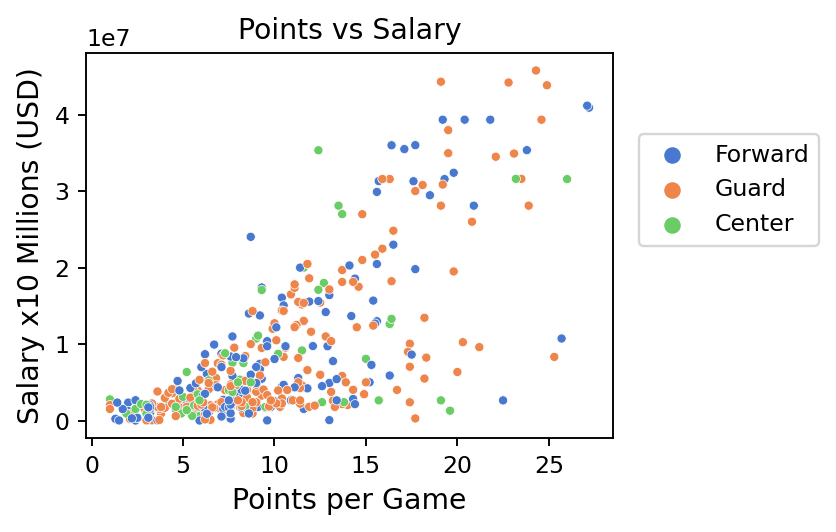

In [650]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)

# I decided to use Scatterplot on Seaborn, this in order to appreciate the clear tendency reflecting that...
# For More Points get More Salary
# Using matplot lib I edit the legend of the pot, also the labels of the axis

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = working_df, x = 'PTS', y = 'SALARY_21-22', hue = 'POSITION', s=15, palette='muted') 
plt.legend(loc=(1.05,0.5))
ax.set_xlabel( "Points per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Points vs Salary" , size = 12 ) 
plt.show() 


3- Now plot assists-vs-salary and rebounding-vs-salary

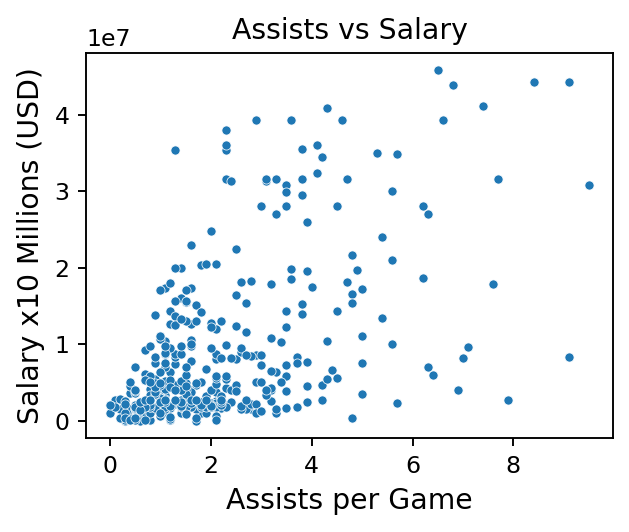

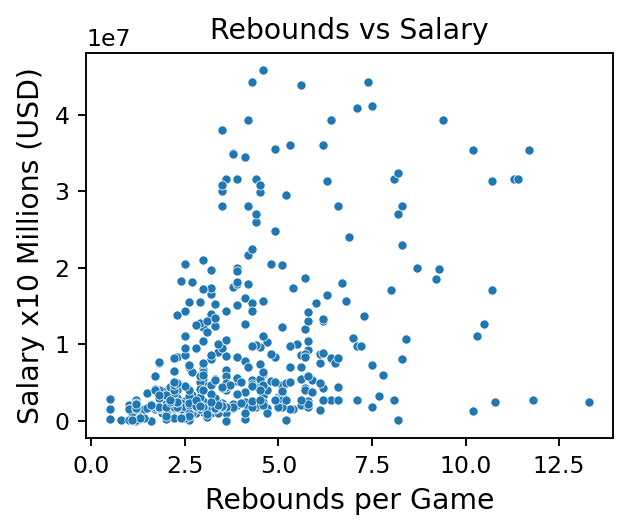

In [651]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary

# I keep using Scatterplot, to see how is the behavior of assists and rebounds vs the salary
# We can appreciate there is much bigger dispersion, where the highest are located more in the middle of the plot
# Which means both paratemers are not as decesive as the points, regarding the salary

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = working_df, x = 'AST', y = 'SALARY_21-22', s=15, palette='muted') 
ax.set_xlabel( "Assists per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Assists vs Salary" , size = 12 ) 
plt.show() 

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = working_df, x = 'REB', y = 'SALARY_21-22', s=15, palette='muted') 
ax.set_xlabel( "Rebounds per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Rebounds vs Salary" , size = 12 ) 
plt.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

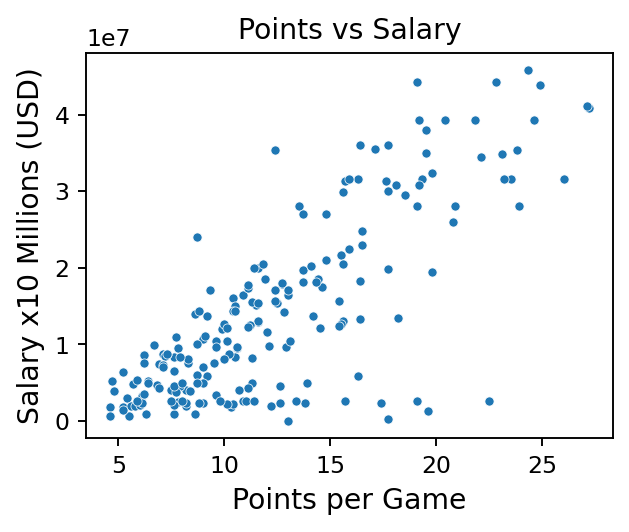

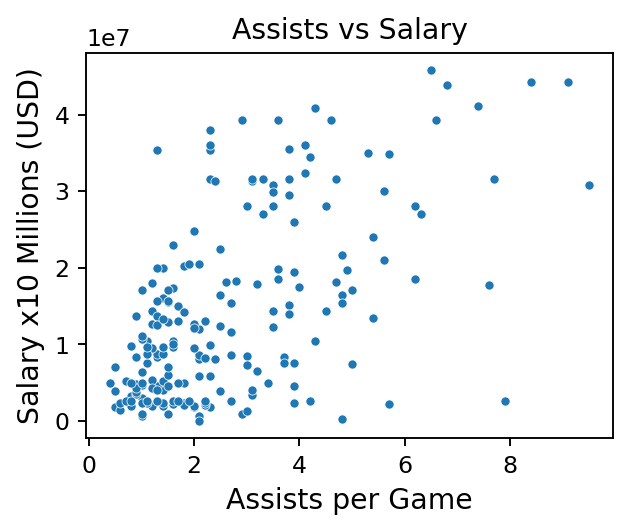

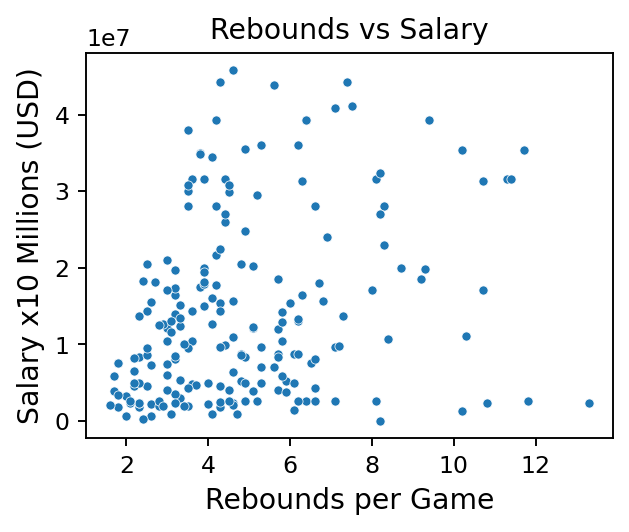

In [652]:
### Complete in this cell: non rookie contracts

# I create a new DataFrame where I put all the players that have experience of 4 years and more
# Then I apply this new DF to the new Scatterplots

without_rookie = pd.DataFrame()
without_rookie = working_df[working_df['SEASON_EXP'] >= 4]

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = without_rookie, x = 'PTS', y = 'SALARY_21-22', s=15, palette='muted') 
ax.set_xlabel( "Points per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Points vs Salary" , size = 12 ) 
plt.show()

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = without_rookie, x = 'AST', y = 'SALARY_21-22', s=15, palette='muted') 
ax.set_xlabel( "Assists per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Assists vs Salary" , size = 12 ) 
plt.show()

fig, ax = plt.subplots(figsize =(4,3),dpi=170) 
sns.scatterplot(data = without_rookie, x = 'REB', y = 'SALARY_21-22', s=15, palette='muted') 
ax.set_xlabel( "Rebounds per Game" , size = 12 ) 
ax.set_ylabel( "Salary x10 Millions (USD)" , size = 12 ) 
ax.set_title( "Rebounds vs Salary" , size = 12 ) 
plt.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

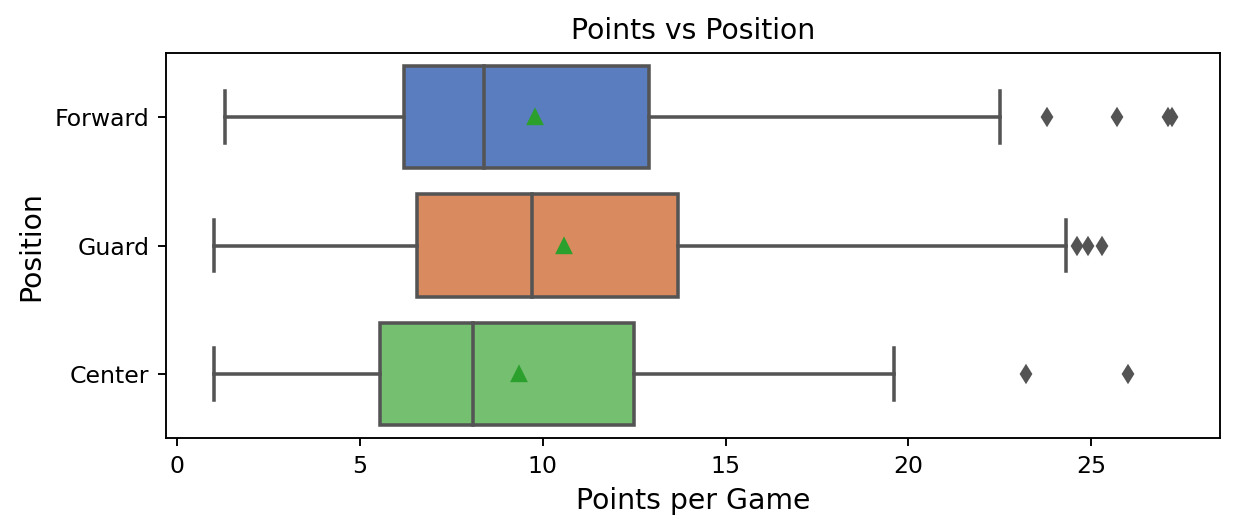

In [655]:
### Complete in this cell: Scoring average grouped by position

# I decided to use Boxplot so we can appreciate the median and quartiles
# In order to see where the median is located, I used "showmeans"

fig, ax = plt.subplots(figsize =(8,3),dpi=170) 
sns.boxplot(data = working_df, x = 'PTS', y = 'POSITION', palette='muted', showmeans=True) 
ax.set_xlabel( "Points per Game" , size = 12 ) 
ax.set_ylabel( "Position" , size = 12 ) 
ax.set_title( "Points vs Position" , size = 12 ) 
plt.show()

6- Plot the Height distribution of all players

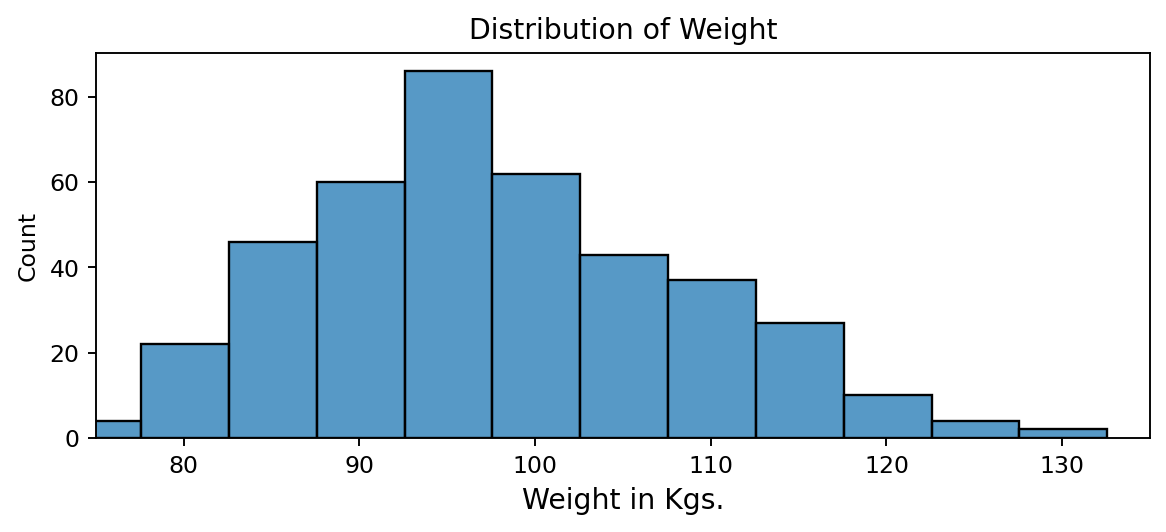

In [654]:
### Complete in this cell: height distribution

# I decided to use a histogram in order to count and create ranges to see the distribution of the weight
# With this plot we can appreciate that big majority of the players are between 90 and 100 kilograms

fig, ax = plt.subplots(figsize =(8,3),dpi=170) 
sns.histplot(data = working_df, x = 'WEIGHT', palette='muted', binwidth = 5)
ax.set_xlabel( "Weight in Kgs." , size = 12 )
ax.set_xlim(xmin=75.0, xmax=135.0)
ax.set_title( "Distribution of Weight" , size = 12 ) 
plt.show()

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)